#### **Prediction Pipeline**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Personalized_Financial_Advisor_Project/Testing_Stock_Data/Combined_Testing_DataFile_with_stockid.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
# Sort the dataframe by stock_id and timestamp
df = df.sort_values(['stock_id', 'date'])

# Encode stock_id as integers
le = LabelEncoder()
df['stock_id_encoded'] = le.fit_transform(df['stock_id'])

In [4]:
df.head()

,date,volume,open,high,low,close,rsi,SMA20,MACD,stock_name,stock_id,stock_id_encoded
0,2024-09-13,4998901.0,252.54,256.83,252.445,254.57,52.3676,272.999,0.000000,CRM,1,0
23,2024-09-16,5367024.0,254.57,257.81,254.570,256.91,55.3269,272.999,0.186667,CRM,1,0
46,2024-09-17,5423388.0,258.72,259.37,254.760,255.19,52.7335,272.999,0.193580,CRM,1,0
69,2024-09-18,4436734.0,256.00,256.12,250.960,252.43,49.3176,272.999,-0.023380,CRM,1,0
92,2024-09-19,11022830.0,260.72,269.54,258.050,265.99,63.8359,272.999,0.888613,CRM,1,0


In [5]:
df[['stock_name', 'stock_id_encoded']].groupby(['stock_name', 'stock_id_encoded']).nunique()

,
stock_name,stock_id_encoded
CRM,0
CSCO,1
CVX,2
DOW,3
GS,4
HD,5
HON,6
IBM,7
INTC,8


In [6]:
value_counts = df['stock_id'].value_counts()
value_counts

,count
stock_id,
1,60
13,60
22,60
21,60
20,60
19,60
18,60
17,60
16,60


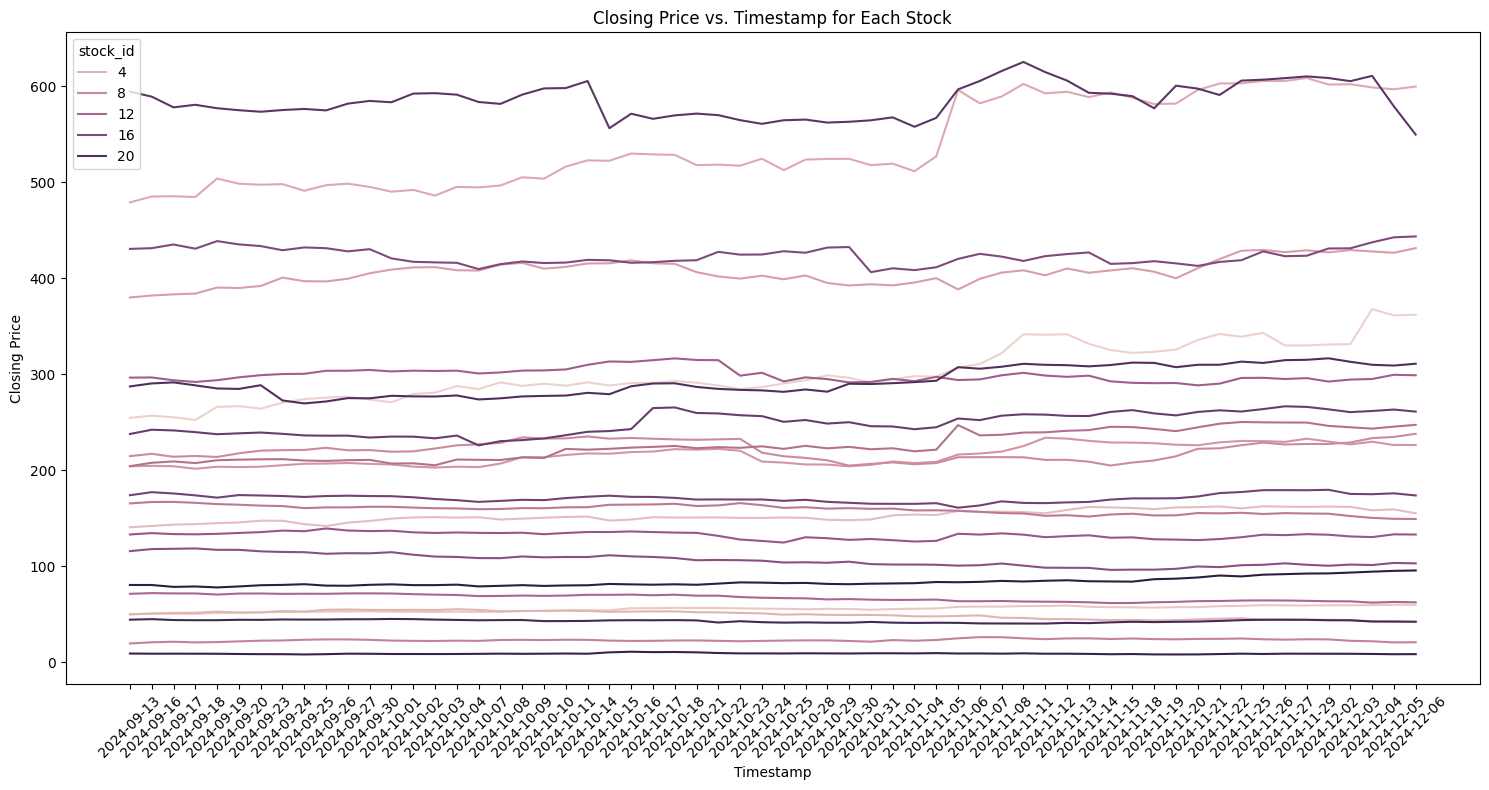

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined_df' is your DataFrame
# Create the plot
plt.figure(figsize=(15, 8))
sns.lineplot(x='date', y='close', hue='stock_id', data=df)
plt.title('Closing Price vs. Timestamp for Each Stock')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [8]:
df[['close', 'rsi', 'SMA20', 'MACD']]

,close,rsi,SMA20,MACD
0,254.57,52.3676,272.9990,0.000000
23,256.91,55.3269,272.9990,0.186667
46,255.19,52.7335,272.9990,0.193580
69,252.43,49.3176,272.9990,-0.023380
92,265.99,63.8359,272.9990,0.888613
...,...,...,...,...
1287,92.64,78.6011,86.8095,2.605729
1310,93.51,80.2097,87.3625,2.745215
1333,94.45,81.8016,87.9010,2.898200
1356,95.30,83.1235,88.4940,3.052839


In [9]:
df['stock_name']

,stock_name
0,CRM
23,CRM
46,CRM
69,CRM
92,CRM
...,...
1287,WMT
1310,WMT
1333,WMT
1356,WMT


In [10]:
import numpy as np

# Create sequences for each stock
X_price_list = []
y_list = []
X_stock_list = []

for stock_id, group in df.groupby('stock_id_encoded'):
    print(f"Processing stock ID: {stock_id}")
    X_price = np.array(group[['close', 'rsi', 'SMA20', 'MACD']])
    X_stock = np.array(stock_id)
    X_price = np.expand_dims(X_price, axis=0)
    X_stock = np.expand_dims(X_stock, axis=0)
    X_price_list.append(X_price)
    X_stock_list.append(X_stock)

# # # Combine sequences from all stocks
X_price = np.concatenate(X_price_list)
# y = np.concatenate(y_list)
X_stock = np.concatenate(X_stock_list)

# # # Reshape X_stock to match the required shape
X_stock = X_stock.reshape(-1, 1)

# # # Verify shapes
print("X_price shape:", X_price.shape)
print("X_stock shape:", X_stock.shape)
# print("y shape:", y.shape)

Processing stock ID: 0
Processing stock ID: 1
Processing stock ID: 2
Processing stock ID: 3
Processing stock ID: 4
Processing stock ID: 5
Processing stock ID: 6
Processing stock ID: 7
Processing stock ID: 8
Processing stock ID: 9
Processing stock ID: 10
Processing stock ID: 11
Processing stock ID: 12
Processing stock ID: 13
Processing stock ID: 14
Processing stock ID: 15
Processing stock ID: 16
Processing stock ID: 17
Processing stock ID: 18
Processing stock ID: 19
Processing stock ID: 20
Processing stock ID: 21
Processing stock ID: 22
X_price shape: (23, 60, 4)
X_stock shape: (23, 1)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_price_normalized = scaler.fit_transform(X_price.reshape(-1, 4)).reshape(X_price.shape)

In [12]:
X_price_normalized.shape

(23, 60, 4)

In [13]:
X_stock

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22]])

In [14]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Personalized_Financial_Advisor_Project/Testing_Stock_Data/Final_LSTM_Model.keras')
predictions = model.predict([X_price_normalized, X_stock])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


In [15]:
predictions

array([[357.48486 ],
       [ 58.930004],
       [148.72726 ],
       [ 42.278423],
       [554.0161  ],
       [414.80774 ],
       [215.6437  ],
       [230.87212 ],
       [ 20.54554 ],
       [143.54314 ],
       [235.64806 ],
       [ 60.491043],
       [295.62076 ],
       [129.38983 ],
       [100.27793 ],
       [443.51163 ],
       [163.14465 ],
       [253.91983 ],
       [537.46826 ],
       [298.54312 ],
       [ 39.77135 ],
       [  9.543358],
       [ 93.67312 ]], dtype=float32)

In [ ]:
import pandas as pd

# Create a new DataFrame for predictions
predictions_df = pd.DataFrame({'predictions': predictions.flatten(), 'stock_id': X_stock.flatten()})

print(predictions_df)

    predictions  stock_id
0    357.484863         0
1     58.930004         1
2    148.727264         2
3     42.278423         3
4    554.016113         4
5    414.807739         5
6    215.643707         6
7    230.872116         7
8     20.545540         8
9    143.543137         9
10   235.648056        10
11    60.491043        11
12   295.620758        12
13   129.389832        13
14   100.277931        14
15   443.511627        15
16   163.144653        16
17   253.919830        17
18   537.468262        18
19   298.543121        19
20    39.771351        20
21     9.543358        21
22    93.673119        22


In [ ]:
actual_df = [351.57, 58.95, 157.08, 42.3, 594.2, 429.18, 225.09, 230.00, 20.81, 149.60, 243.81, 62.60, 301.37, 131.49, 103.79, 446.02, 170.79, 251.92, 560, 308.30, 42.36, 8.85, 93.83]

In [ ]:
actual_df

[351.57,
 58.95,
 157.08,
 42.3,
 594.2,
 429.18,
 225.09,
 230.0,
 20.81,
 149.6,
 243.81,
 62.6,
 301.37,
 131.49,
 103.79,
 446.02,
 170.79,
 251.92,
 560,
 308.3,
 42.36,
 8.85,
 93.83]

In [ ]:
predictions_df['actual_close'] = actual_df

In [ ]:
CRM
CSCO
CVX
DOW
GS
HD
HON
IBM
INTC
JNJ
JPM
KO
MCD
MMM
MRK
MSFT
PG
TRV
UNH
V
VZ
WBA
WMT

In [ ]:
predictions_df['stock_name'] = ["CRM","CSCO","CVX","DOW","GS","HD","HON","IBM","INTC","JNJ","JPM","KO","MCD","MMM","MRK","MSFT","PG","TRV","UNH","V","VZ","WBA","WMT"]

In [ ]:
predictions_df

,predictions,stock_id,actual_close,stock_name
0,357.484863,0,351.57,CRM
1,58.930004,1,58.95,CSCO
2,148.727264,2,157.08,CVX
3,42.278423,3,42.30,DOW
4,554.016113,4,594.20,GS
5,414.807739,5,429.18,HD
6,215.643707,6,225.09,HON
7,230.872116,7,230.00,IBM
8,20.545540,8,20.81,INTC
9,143.543137,9,149.60,JNJ


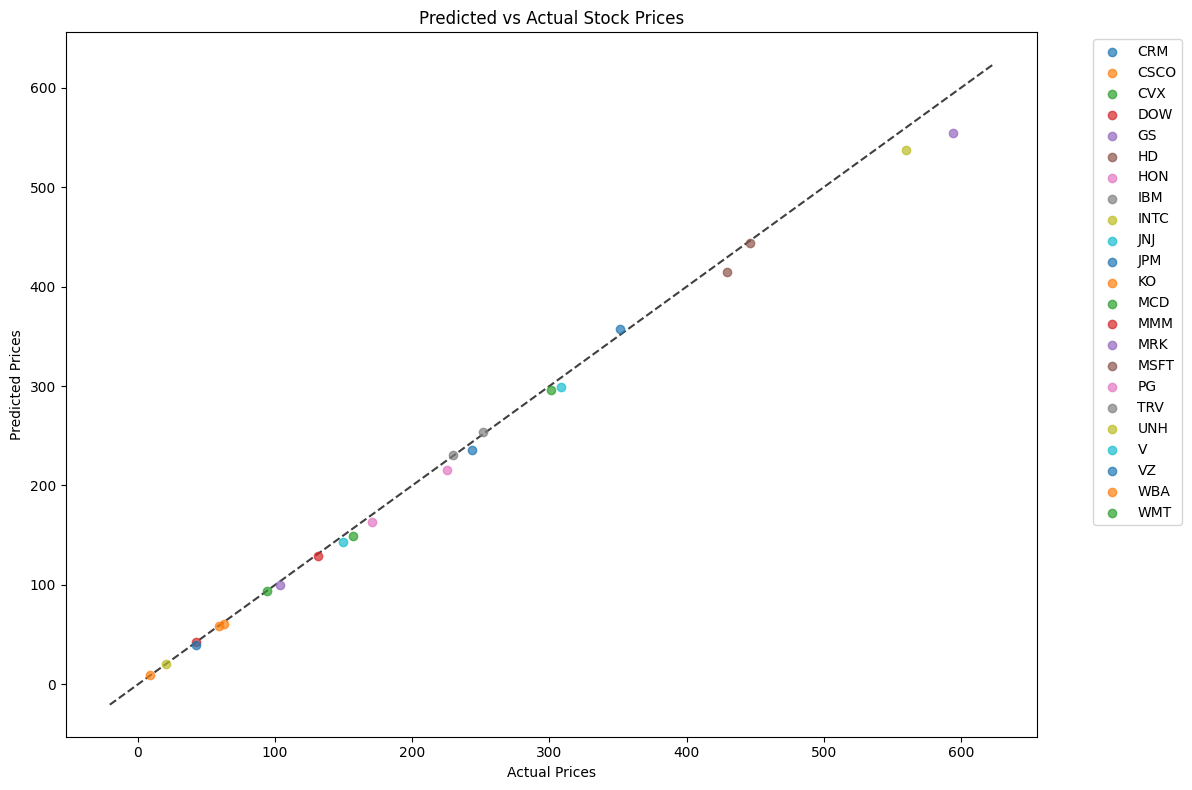

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is called 'df' with columns 'actual_price', 'predicted_price', and 'stock_name'
fig, ax = plt.subplots(figsize=(12, 8))

for stock in predictions_df['stock_name'].unique():
    stock_data = predictions_df[predictions_df['stock_name'] == stock]
    ax.scatter(stock_data['actual_close'], stock_data['predictions'], label=stock, alpha=0.7)

# Add identity line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

ax.set_xlabel('Actual Prices')
ax.set_ylabel('Predicted Prices')
ax.set_title('Predicted vs Actual Stock Prices')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


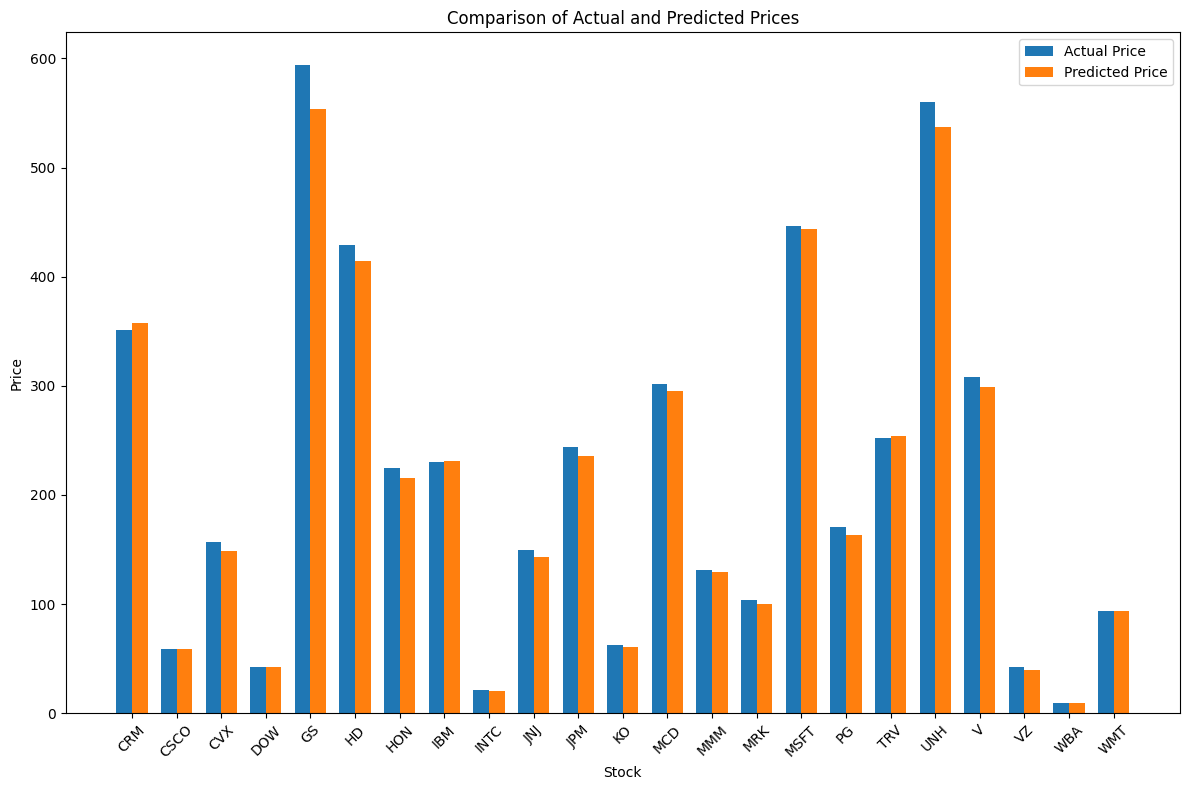

In [ ]:
import numpy as np

# Grouped bar chart
x = np.arange(len(predictions_df['stock_id']))
width = 0.35  # Bar width

plt.figure(figsize=(12, 8))
plt.bar(x - width/2, predictions_df['actual_close'], width, label='Actual Price')
plt.bar(x + width/2, predictions_df['predictions'], width, label='Predicted Price')

plt.xlabel('Stock')
plt.ylabel('Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.xticks(x, predictions_df['stock_name'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
CRM_stock_df = pd.read_csv('/content/gdrive/MyDrive/602_project/historical_data_CRM.csv')

In [ ]:
def load_and_preprocess(file_path, stock_id):
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = df[df['timestamp'] >= pd.to_datetime('2014-11-02')]
    df['stock_id'] = stock_id
    df = compute_indicators(df)
    return df[['timestamp', 'volume', 'close', 'RSI', 'SMA20', 'MACD', 'stock_id']]

def compute_indicators(df):
    # Calculate RSI (14-day period)
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Calculate SMA20
    df['SMA20'] = df['close'].rolling(window=20).mean()

    # Calculate MACD
    exp12 = df['close'].ewm(span=12, adjust=False).mean()
    exp26 = df['close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp12 - exp26

    # Forward fill NA values
    df.fillna(method='ffill', inplace=True)

    # If there are still NA values at the beginning, back fill them
    df.fillna(method='bfill', inplace=True)
    return df

CRM_stock_df = load_and_preprocess('/content/gdrive/MyDrive/602_project/historical_data_CRM.csv', 0)

<ipython-input-103-769807de469b>:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-103-769807de469b>:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
CRM_stock_df

,timestamp,volume,close,RSI,SMA20,MACD,stock_id
0,2024-10-16,3450377,290.86,35.819705,279.9915,0.000000,0
1,2024-10-15,3850782,288.35,35.819705,279.9915,-0.200228,0
2,2024-10-14,3642540,291.64,35.819705,279.9915,-0.092370,0
3,2024-10-11,3597035,288.10,35.819705,279.9915,-0.289206,0
4,2024-10-10,3965512,290.17,35.819705,279.9915,-0.274998,0
...,...,...,...,...,...,...,...
2500,2014-11-07,3639478,63.97,69.825919,60.8675,1.579875,0
2501,2014-11-06,3994192,63.09,68.241966,61.0795,1.513816,0
2502,2014-11-05,4971061,61.91,61.030043,61.2275,1.350677,0
2503,2014-11-04,2655085,63.57,72.719735,61.4620,1.339891,0


In [ ]:
stock_id_df = CRM_stock_df['stock_id']

In [ ]:
CRM_stock_df = CRM_stock_df[['timestamp', 'close', 'RSI',	'SMA20',	'MACD']]

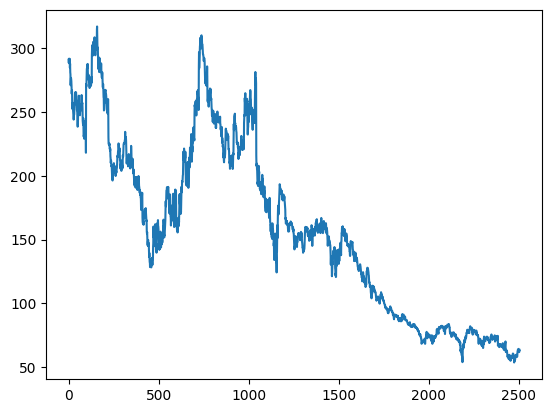

In [ ]:
from matplotlib import pyplot as plt
df2 = CRM_stock_df.reset_index()['close']
plt.plot(df2)

In [ ]:
# Function to create sequences
def create_sequences(group, seq_length=60):
    sequences = []
    targets = []
    stock_ids = []

    for i in range(len(group) - seq_length):
        seq = group.iloc[i:i+seq_length][['close', 'RSI', 'SMA20', 'MACD']].values
        target = group.iloc[i+seq_length]['close']
        stock_id = group.iloc[i]['stock_id']

        sequences.append(seq)
        targets.append(target)
        stock_ids.append(stock_id)

    return np.array(sequences), np.array(targets), np.array(stock_ids)

# Create sequences for each stock
crm_X_price_list = []
crm_y_list = []
crm_X_stock_list = []

for stock_id, group in CRM_stock_df.groupby('stock_id'):
    print(f"Processing stock ID: {stock_id}")
    crm_X_price, crm_y, crm_X_stock = create_sequences(group)
    crm_X_price_list.append(crm_X_price)
    crm_y_list.append(crm_y)
    crm_X_stock_list.append(crm_X_stock)

# Combine sequences from all stocks
crm_X_price = np.concatenate(crm_X_price_list)
crm_y = np.concatenate(crm_y_list)
crm_X_stock = np.concatenate(crm_X_stock_list)

# Reshape X_stock to match the required shape
crm_X_stock = crm_X_stock.reshape(-1, 1)

# Verify shapes
print("X_price shape:", crm_X_price.shape)
print("X_stock shape:", crm_X_stock.shape)
print("y shape:", crm_y.shape)

# # Save the arrays
# np.save('X_price.npy', X_price)
# np.save('X_stock.npy', X_stock)
# np.save('y.npy', y)

# # Save the LabelEncoder
# import joblib
# joblib.dump(le, 'stock_id_encoder.joblib')

Processing stock ID: 0
X_price shape: (2445, 60, 4)
X_stock shape: (2445, 1)
y shape: (2445,)


In [ ]:
crm_X_entire_normalized = scaler.fit_transform(crm_X_price.reshape(-1, 4)).reshape(crm_X_price.shape)

In [ ]:
crm_predictions = model.predict([crm_X_entire_normalized, crm_X_stock])

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:
crm_pred_df = pd.DataFrame(crm_predictions, columns = ['predicted_price']).dropna()
crm_pred_df['actual_val'] = y
time = CRM_stock_df[['timestamp']].values
crm_pred_df['timestamp'] = time[:time.shape[0]-60]

In [ ]:
crm_pred_df

,predicted_price,actual_val,timestamp
0,464.054108,256.06,2024-10-16
1,474.369354,254.08,2024-10-15
2,472.761658,247.63,2024-10-14
3,464.048004,247.35,2024-10-11
4,458.725922,251.22,2024-10-10
...,...,...,...
2440,35.307453,63.97,2015-02-05
2441,35.241100,63.09,2015-02-04
2442,34.310795,61.91,2015-02-03
2443,32.319771,63.57,2015-02-02


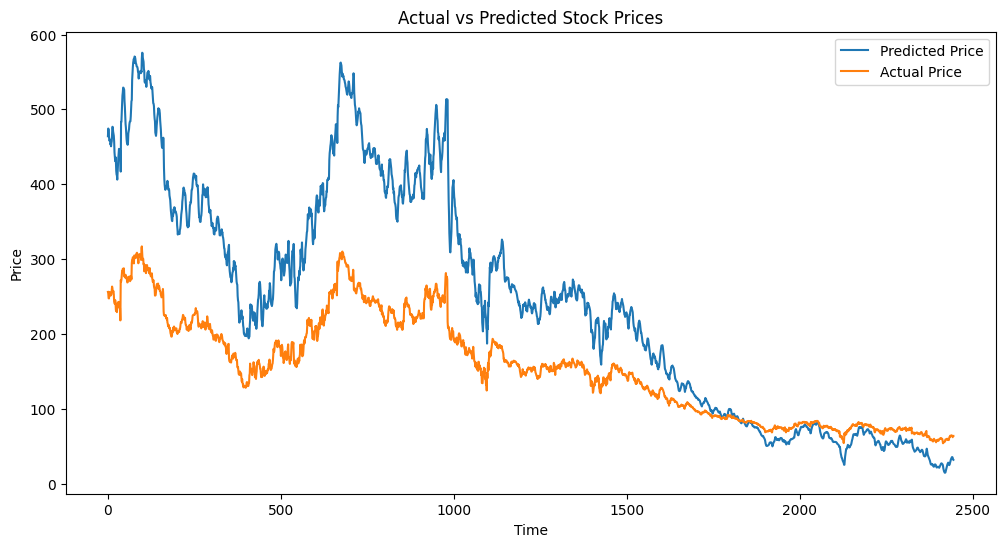

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(crm_pred_df['predicted_price'], label='Predicted Price')
plt.plot(crm_pred_df['actual_val'], label='Actual Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()